## 4-2. 스크래핑 결과 시각화하기 I - 해시코드 질문태그 빈도 시각화

- bs4와 Seaborn을 이용해서 질문의 주제 빈도를 보여주는 시각화를 진행해봅시다.

### Target: 해시코드 질문 태그의 빈도 확인

이전에 진행한 해시코드(https://hashcode.co.kr) 사이트에선 다양한 질문이 올라왔는데,  
질문제목 아래에 "태그"가 있었습니다.

이 태그의 빈도를 측정하면 어떤 주제의 질문이 많이 올라오는지 알 수 있을 것 같습니다.  
이를 스크래핑 후 시각화해봅시다.

In [29]:
from selenium import webdriver
from selenium.webdriver import ActionChains
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.actions.action_builder import ActionBuilder
from selenium.webdriver import Keys, ActionChains
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
from collections import Counter
import time
from tqdm import tqdm

In [4]:
# 다음 User-Agent를 추가해봅시다.
user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}
req = requests.get('https://hashcode.co.kr',user_agent)
soup = BeautifulSoup(req.text,'html.parser')

In [27]:
#방법 1: question-tags를 찾은 후 손으로 하기
questions = soup.find_all('ul','question-tags')
tag_list = []
for question in questions:
    # print(question.text)
    tags = question.text.strip().split('\n')
    for tag in tags:
        if tag not in {'',' '}:
            tag_list.append(tag)
tag_counter = Counter(tag_list)
print(tag_counter)
print(len(tag_counter))


Counter({'python': 9, 'java': 8, 'html': 4, 'css': 4, 'javascript': 3, 'anaconda': 2, 'android-studio': 2, 'c': 2, 'aws': 2, 'macbook': 2, 'php': 2, 'flutter': 2, 'tensorflow': 2, 'jupyter': 1, 'error': 1, 'syntax-error': 1, 'if문': 1, 'dbms': 1, 'intent': 1, 'scanf': 1, 'ubuntu': 1, 'ssh': 1, 'auth': 1, 'react': 1, 'jupyter-notebook': 1, 'virtualenv': 1, 'youtube': 1, 'atmega128': 1, 'spring-boot': 1, 'jpa': 1, 'spring-data-jpa': 1, 'hibernate': 1, 'spring': 1, 'android': 1, 'string': 1, 'linux': 1, 'web-crawling': 1, 'beautifulsoup': 1, 'requests': 1, 'idle': 1, 'ssl': 1, 'letsencrypt': 1, 'nginx': 1, 'load-balancing': 1, 'algorithm': 1, 'front-end': 1, 'operator': 1, 'coding': 1, 'crawling': 1, 'warning': 1, 'array': 1, 'key': 1, 'line': 1, 'sql': 1, 'xcode': 1, 'software_development': 1, 'developer': 1})
57


In [ ]:
#방법 2: li tag 사용
questions = soup.find_all('li','label label-tag')
tag_list2 = []
for question in questions:
    #print(question.text.strip())
    tag_list2.append(question.text.strip())

tag_counter2 = Counter(tag_list2)
print(tag_counter)
print(len(tag_counter2))


Counter({'python': 9, 'java': 8, 'html': 4, 'css': 4, 'javascript': 3, 'anaconda': 2, 'android-studio': 2, 'c': 2, 'aws': 2, 'macbook': 2, 'php': 2, 'flutter': 2, 'tensorflow': 2, 'jupyter': 1, 'error': 1, 'syntax-error': 1, 'if문': 1, 'dbms': 1, 'intent': 1, 'scanf': 1, 'ubuntu': 1, 'ssh': 1, 'auth': 1, 'react': 1, 'jupyter-notebook': 1, 'virtualenv': 1, 'youtube': 1, 'atmega128': 1, 'spring-boot': 1, 'jpa': 1, 'spring-data-jpa': 1, 'hibernate': 1, 'spring': 1, 'android': 1, 'string': 1, 'linux': 1, 'web-crawling': 1, 'beautifulsoup': 1, 'requests': 1, 'idle': 1, 'ssl': 1, 'letsencrypt': 1, 'nginx': 1, 'load-balancing': 1, 'algorithm': 1, 'front-end': 1, 'operator': 1, 'coding': 1, 'crawling': 1, 'warning': 1, 'array': 1, 'key': 1, 'line': 1, 'sql': 1, 'xcode': 1, 'software_development': 1, 'developer': 1})
57


In [ ]:
# 질문의 빈도를 체크하는 dict를 만든 후, 빈도를 체크해봅시다.
#방법 2: li tag 사용

user_agent = {"User-Agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36"}
tag_list2 = []
for i in tqdm(range(1,250)):
    req = requests.get(f'https://hashcode.co.kr/?page={i}',user_agent)
    soup = BeautifulSoup(req.text,'html.parser')

    questions = soup.find_all('li','label label-tag')
    for question in questions:
        tag_list2.append(question.text.strip())
    time.sleep(0.5)




100%|██████████| 249/249 [03:35<00:00,  1.15it/s]

Counter({'python': 9, 'java': 8, 'html': 4, 'css': 4, 'javascript': 3, 'anaconda': 2, 'android-studio': 2, 'c': 2, 'aws': 2, 'macbook': 2, 'php': 2, 'flutter': 2, 'tensorflow': 2, 'jupyter': 1, 'error': 1, 'syntax-error': 1, 'if문': 1, 'dbms': 1, 'intent': 1, 'scanf': 1, 'ubuntu': 1, 'ssh': 1, 'auth': 1, 'react': 1, 'jupyter-notebook': 1, 'virtualenv': 1, 'youtube': 1, 'atmega128': 1, 'spring-boot': 1, 'jpa': 1, 'spring-data-jpa': 1, 'hibernate': 1, 'spring': 1, 'android': 1, 'string': 1, 'linux': 1, 'web-crawling': 1, 'beautifulsoup': 1, 'requests': 1, 'idle': 1, 'ssl': 1, 'letsencrypt': 1, 'nginx': 1, 'load-balancing': 1, 'algorithm': 1, 'front-end': 1, 'operator': 1, 'coding': 1, 'crawling': 1, 'warning': 1, 'array': 1, 'key': 1, 'line': 1, 'sql': 1, 'xcode': 1, 'software_development': 1, 'developer': 1})
2479


In [46]:
# Counter를 사용해 가장 빈도가 높은 value들을 추출합니다.

tag_counter2 = Counter(tag_list2)
print(tag_counter2)
print(len(tag_counter2))

Counter({'python': 3961, 'android': 1579, 'java': 1275, 'c': 914, 'c++': 762, 'javascript': 618, 'html': 365, 'list': 264, 'django': 262, 'node.js': 233, 'mysql': 223, 'string': 220, 'array': 209, 'css': 195, 'crawling': 173, 'pandas': 164, 'python3': 160, 'php': 159, 'jquery': 145, 'android-studio': 141, 'database': 140, 'c#': 139, 'json': 137, 'linux': 135, 'web': 134, 'error': 132, 'for': 128, 'selenium': 113, 'dictionary': 104, 'class': 103, 'algorithm': 98, 'ruby-on-rails': 97, 'spring': 95, 'api': 92, 'function': 92, 'ruby': 91, 'pointer': 89, 'sql': 86, 'html5': 86, 'jsp': 83, 'dataframe': 82, 'fragment': 82, 'server': 78, 'ios': 76, 'aws': 68, 'beautifulsoup': 67, 'ubuntu': 65, 'image': 65, 'loops': 65, 'kotlin': 64, 'flask': 64, 'coding': 61, 'file': 61, 'regex': 61, 'listview': 61, 'unity': 60, 'if문': 57, 'tkinter': 56, 'swift': 55, 'socket': 54, 'xml': 54, 'fast-frontend': 54, 'eclipse': 53, 'numpy': 51, 'application': 51, 'react': 50, 'github': 50, 'data-structure': 49, 'op

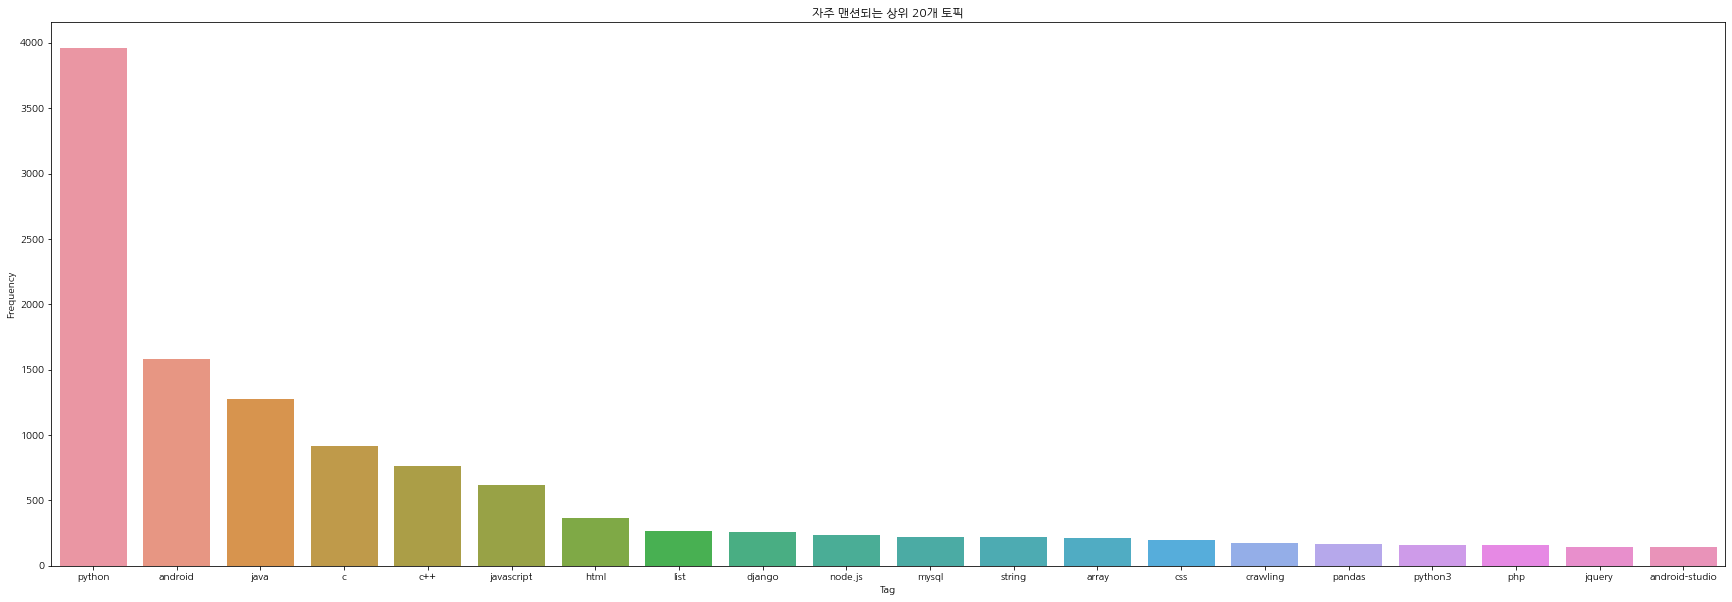

In [51]:
# Seaborn을 이용해 이를 Barplot으로 그립니다.
# 상위 20개만 추출

most_freq20 = tag_counter2.most_common(20)
x = [i[0] for i in most_freq20]
y = [i[-1] for i in most_freq20]
#plt.ylim(min(tag_counter2.values())-1,max(tag_counter2.values()))

plt.figure(figsize=(30,10))
plt.rcParams['font.family'] ='NanumGothic'
plt.rcParams['axes.unicode_minus'] =False
plt.title('자주 맨션되는 상위 20개 토픽')
plt.xlabel('Tag')
plt.ylabel('Frequency')


sns.barplot(
    x = x,
    y = y
)

plt.show()


In [ ]:
# figure, xlabel, ylabel, title을 적절하게 설정해서 시각화를 완성해봅시다.

